In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

168


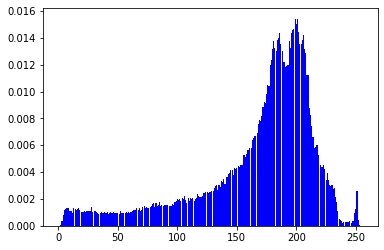

In [3]:
# 1.读取图片并转换为灰度图片
# 2.创建一个1*256的全零数组 用于存放0-255这256个像素值的个数
# 3.用for循环对像素点进行遍历
# 4.根据像素值判断 让像素值加1
# 5.用for循环进行归一化(0-1) 把每一个像素值的个数转换为百分比
# 6.画图
img=cv2.imread('image1.jpg',1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img[0,0])
imgInfo=img.shape
heigth=imgInfo[0]
width=imgInfo[1]
dst=np.zeros(256,np.float)
# print(dst)
for i in range(heigth):
    for j in range(width):
        dst[img[i,j]]=dst[img[i,j]]+1
for i in range(256):
    dst[i]=dst[i]/(width*heigth)
x = np.linspace(0,255,256)
y = dst
plt.bar(x,y,0.9,alpha = 1 ,color = 'b')
plt.show()


In [4]:
dst=np.zeros(255,np.uint8)
dst.shape

(255,)

In [6]:
dst[145]

0

In [15]:
print()

148992


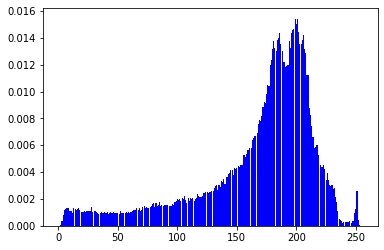

(256,)


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('image1.jpg',1)
# cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
count = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index] = count[index]+1
for i in range(0,256):
    count[i] = count[i]/(height*width)
x = np.linspace(0,255,256)
y = count

plt.bar(x,y,0.9,alpha = 1 ,color = 'b')
plt.show()
print(y.shape)
# print(count)
# cv2.waitKey(0)

(256,)


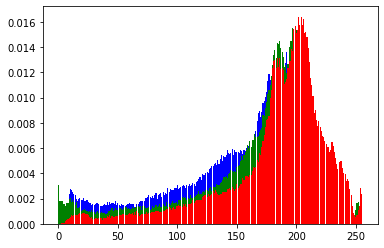

In [15]:
img=cv2.imread('image1.jpg',1)
# img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# print(img[0,0])
imgInfo=img.shape
heigth=imgInfo[0]
width=imgInfo[1]
dstb=np.zeros(256,np.float)
dstg=np.zeros(256,np.float)
dstr=np.zeros(256,np.float)
print(dst.shape)
for i in range(heigth):
    for j in range(width):
        (b,g,r)=img[i,j]
        dstb[b]=dstb[b]+1
        dstg[g]=dstg[g]+1
        dstr[r]=dstr[r]+1
for i in range(256):#归一化
    dstb[i]=dstb[i]/(width*heigth)
    dstg[i]=dstg[i]/(width*heigth)
    dstr[i]=dstr[i]/(width*heigth)
x = np.linspace(0,255,256)
yb = dstb
yg = dstg
yr = dstr
plt.bar(x,yb,0.9,alpha = 1 ,color = 'b')
plt.bar(x,yg,0.9,alpha = 1 ,color = 'g')
plt.bar(x,yr,0.9,alpha = 1 ,color = 'r')
plt.show()

In [3]:
def ImageHist(image,type):
    color=(255,255,255)
    windowName='Gray'
    if type==31:
        color=(255,0,0)
        windowName='B Hist'
    elif type==32:
        color=(0,255,0)
        windowName='G Hist'
    elif type==33:
        color=(0,0,255)
        windowName='R Hist'
    hist=cv2.calcHist([image],[0],None,[256],[0.0,255.0])
    minV,maxV,minL,maxL=cv2.minMaxLoc(hist)
    print(minV,maxV,minL,maxL)
    histImg=np.zeros([256,256,3],np.uint8)
    for h in range(0,256):
        intenNormal=int(hist[h]*256/maxV)
        cv2.line(histImg,(h,256),(h,256-intenNormal),color)
    cv2.imshow(windowName,histImg)
    return histImg

img=cv2.imread('image1.jpg',1)
channels=cv2.split(img)#划分通道 b g r
for i in range(3):
    ImageHist(channels[i],31+i)
cv2.waitKey()
cv2.destroyAllWindows()

0.0 2029.0 (0, 246) (0, 192)
0.0 2306.0 (0, 255) (0, 197)
0.0 2445.0 (0, 0) (0, 204)


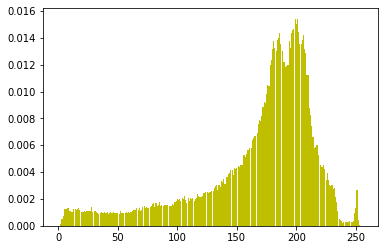

In [40]:
img=cv2.imread('image1.jpg',0)
imgInfo=img.shape
heigth=imgInfo[0]
width=imgInfo[1]
hist=cv2.calcHist([img],[0],None,[256],[0.0,255.0])
hist=hist.reshape(256,)
for i in range(0,256):
    hist[i] = hist[i]/(height*width)
x = np.linspace(0,255,256)
y=hist
plt.bar(x,y,0.9,alpha = 1 ,color = 'y')
plt.show()

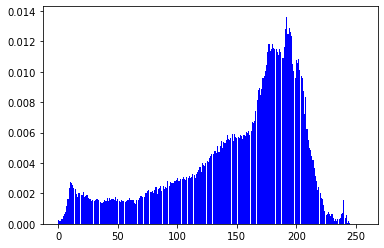

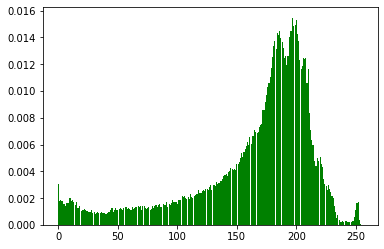

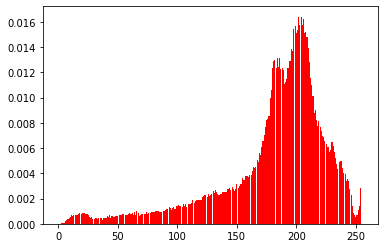

In [41]:
#彩色
img=cv2.imread('image1.jpg',1)
imgInfo=img.shape
heigth=imgInfo[0]
width=imgInfo[1]
histb=cv2.calcHist([img],[0],None,[256],[0,255])
histg=cv2.calcHist([img],[1],None,[256],[0,255])
histr=cv2.calcHist([img],[2],None,[256],[0,255])
histb=histb.reshape(256,)
histg=histg.reshape(256,)
histr=histr.reshape(256,)
for i in range(0,256):
    histb[i] = histb[i]/(heigth*width)
    histg[i] = histg[i]/(heigth*width)
    histr[i] = histr[i]/(heigth*width)
x = np.linspace(0,255,256)
yb=histb
plt.bar(x,yb,0.9,alpha = 1 ,color = 'b')
yg=histg
plt.show()
plt.bar(x,yg,0.9,alpha = 1 ,color = 'g')
yr=histr
plt.show()
plt.bar(x,yr,0.9,alpha = 1 ,color = 'r')
plt.show()
# plt.bar(x,yb,0.9,alpha = 1 ,color = 'b')
# yg=histg
# plt.bar(x,yg,0.9,alpha = 1 ,color = 'g')
# yr=histr
# plt.bar(x,yr,0.9,alpha = 1 ,color = 'r')
# plt.show()